# Exercise – 1: Working with a Color Image

Read and Display the Image

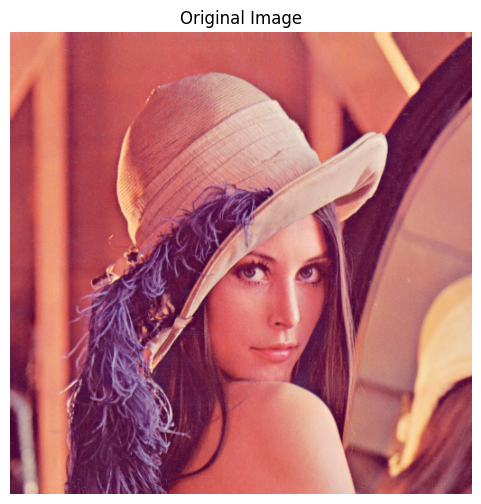

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open("/content/drive/MyDrive/AI/Lenna_(test_image).png")

image.show()

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Display the Top Left 100x100 Pixels

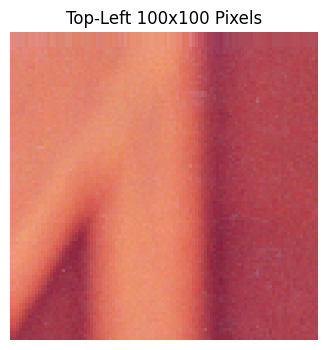

In [ ]:
# Convert the image to a NumPy array for slicing
img_array = np.array(image)

# Extract the top-left corner (first 100 rows and 100 columns)
top_left = img_array[0:100, 0:100]

plt.figure(figsize=(4,4))
plt.imshow(top_left)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()


Show the Three Color Channels (R, G, B)

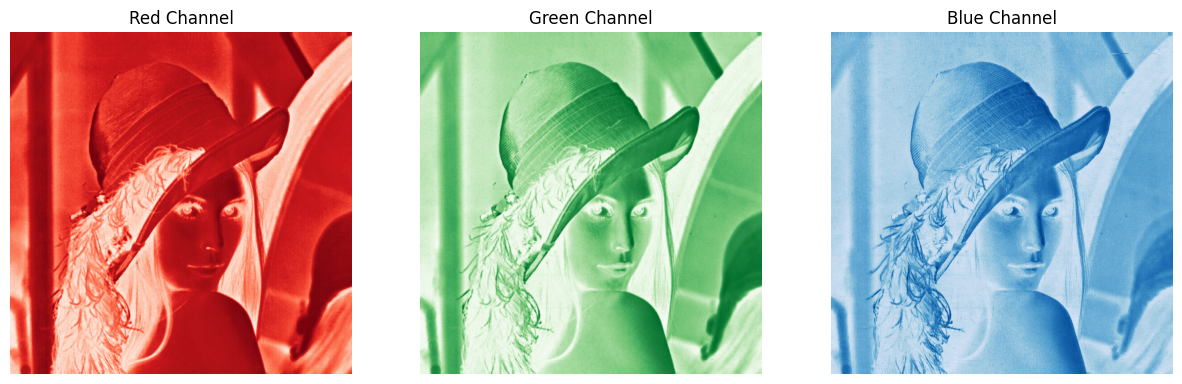

In [ ]:
# Separate the color channels
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

# Display each channel with a corresponding colormap
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()


Modify the Top-Left 100x100 Pixels to a Value of 210 and Display

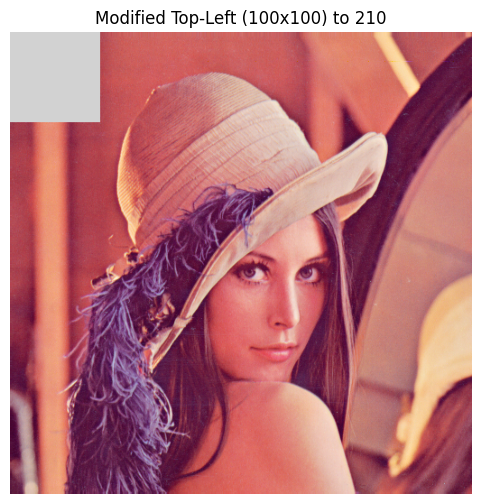

In [ ]:
# Make a copy of the image array so that original remains unchanged
modified_img_array = np.copy(img_array)

# Set the top-left 100x100 region to 210 for all channels
modified_img_array[0:100, 0:100] = 210

plt.figure(figsize=(6,6))
plt.imshow(modified_img_array)
plt.title("Modified Top-Left (100x100) to 210")
plt.axis("off")
plt.show()


# Exercise – 2: Working with a Grayscale Image

Load and Display a Grayscale Image

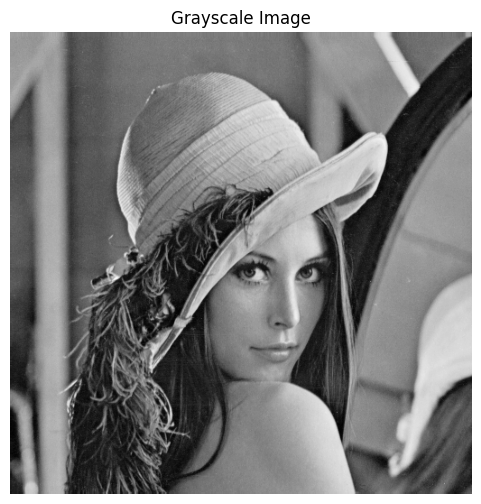

In [ ]:
# Convert the color image to grayscale
gray_image = image.convert('L')

plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


Extract and Display the Middle 150x150 Section

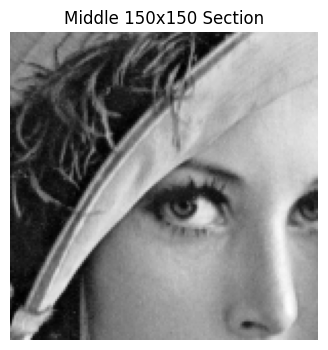

In [ ]:
# Convert grayscale image to a NumPy array
gray_array = np.array(gray_image)
height, width = gray_array.shape

# Find the center of the image
center_y, center_x = height // 2, width // 2

# Define half the size of the crop (150x150 -> half size = 75)
start_y = max(center_y - 75, 0)
end_y = start_y + 150
start_x = max(center_x - 75, 0)
end_x = start_x + 150

# Extract the middle section
middle_section = gray_array[start_y:end_y, start_x:end_x]

plt.figure(figsize=(4,4))
plt.imshow(middle_section, cmap='gray')
plt.title("Middle 150x150 Section")
plt.axis("off")
plt.show()


Apply a Threshold to Create a Binary Image

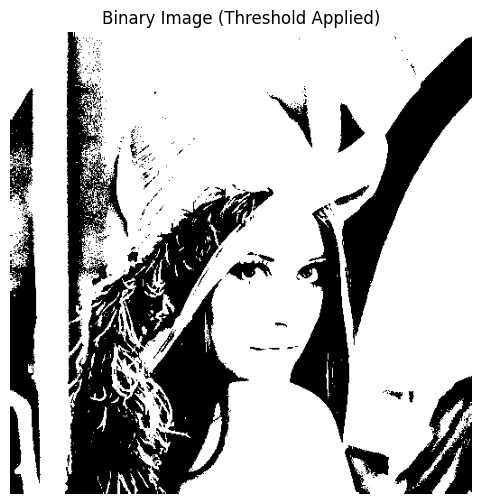

In [ ]:
# Set a threshold value; below 100 becomes 0, above (or equal) becomes 255
threshold = 100
binary_image = np.where(gray_array < threshold, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image (Threshold Applied)")
plt.axis("off")
plt.show()


 Rotate the Image 90 Degrees Clockwise

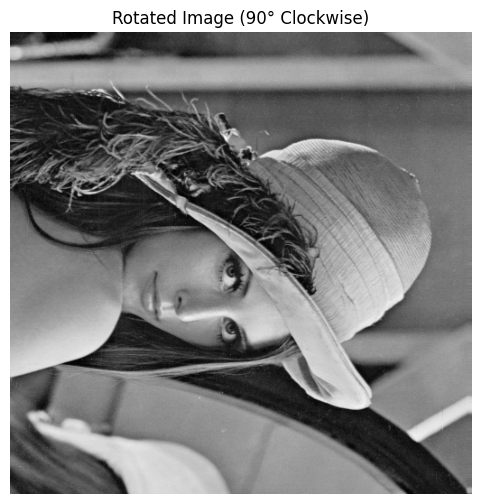

In [ ]:
# Rotate the grayscale image by 90 degrees clockwise.
# PIL's transpose method with ROTATE_270 rotates 90° clockwise.
rotated_image = gray_image.transpose(Image.ROTATE_270)

plt.figure(figsize=(6,6))
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()


Convert the Grayscale Image to an RGB Image

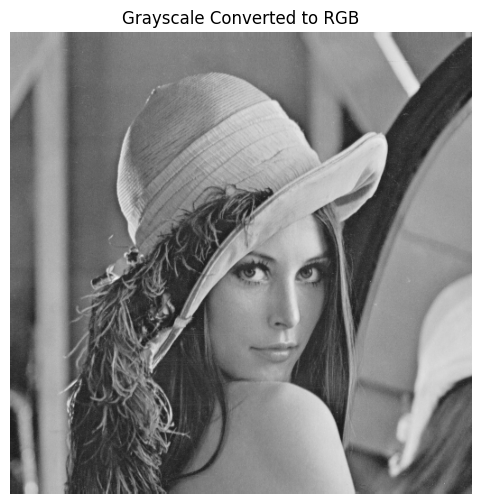

In [ ]:
# Convert grayscale back to RGB so that each channel contains the same intensity values
rgb_from_gray = gray_image.convert("RGB")

plt.figure(figsize=(6,6))
plt.imshow(rgb_from_gray)
plt.title("Grayscale Converted to RGB")
plt.axis("off")
plt.show()


Image Compression and Decompression using PCA

 Load, Prepare, and Standardize the Data

In [ ]:

img_pca = image.convert('L')
img_pca_array = np.array(img_pca, dtype=np.float64)

# Standardize the data by subtracting the mean of each column (each pixel column is treated as a feature)
mean_image = np.mean(img_pca_array, axis=0)
centered_data = img_pca_array - mean_image

# Compute the covariance matrix (columns as features, rows as observations)
cov_matrix = np.cov(centered_data, rowvar=False)


Eigen Decomposition and Identifying Principal Components

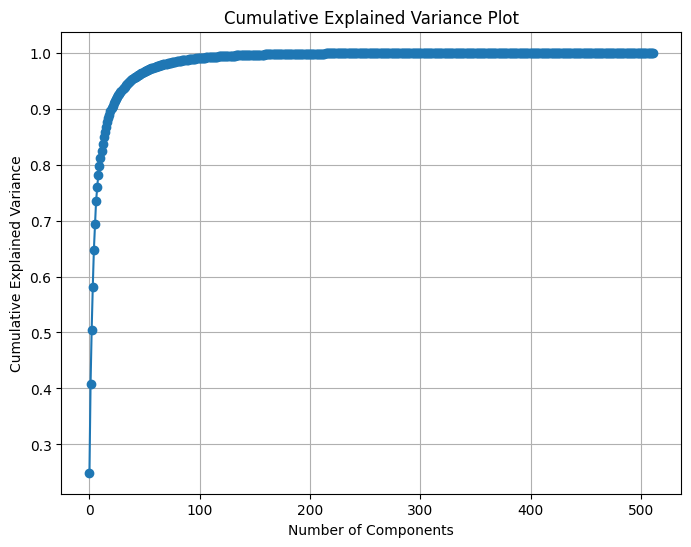

In [ ]:
# Compute eigenvalues and eigenvectors from the covariance matrix
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues (and corresponding eigenvectors) in descending order
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Compute the explained variance ratio
explained_variance_ratio = eig_vals / np.sum(eig_vals)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance to help decide on the number of principal components
plt.figure(figsize=(8,6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid(True)
plt.show()


Reconstruction and Experimentation

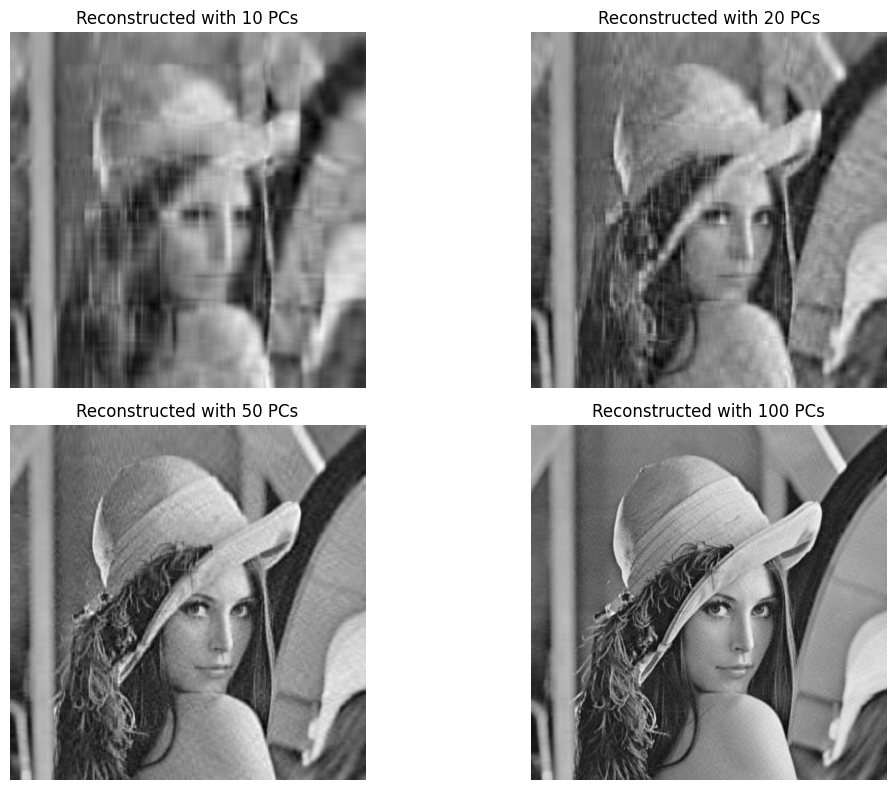

In [ ]:
def reconstruct_image(centered_data, eig_vecs, k, mean_image):

    # Select the top k eigenvectors
    components = eig_vecs[:, :k]

    # Project the data onto these components
    projected_data = np.dot(centered_data, components)

    # Reconstruct the image from the projection
    reconstructed = np.dot(projected_data, components.T) + mean_image
    return reconstructed

# Experiment with various numbers of principal components
ks = [10, 20, 50, 100]  # adjust these values as needed

plt.figure(figsize=(12, 8))
for i, k in enumerate(ks):
    rec_image = reconstruct_image(centered_data, eig_vecs, k, mean_image)

    plt.subplot(2, 2, i+1)
    plt.imshow(rec_image, cmap='gray')
    plt.title(f"Reconstructed with {k} PCs")
    plt.axis("off")
plt.tight_layout()
plt.show()
